
# Pandas & NumPy

## Zadanie

Firma **TechMarket** zbiera údaje o predaji svojich produktov. Vašou úlohou je spracovať tieto dáta pomocou knižníc **Pandas** a **NumPy**.

---


## 1. Vytvorte DataFrame so štruktúrou:

`product, category, price, units_sold, rating`

Použite tieto údaje:

```python
products = [
    ["Laptop X200", "Electronics", 899, 120, 4.6],
    ["Laptop AirLite", "Electronics", 1099, 75, 4.8],
    ["SmartWatch Fit", "Wearables", 199, 310, 4.2],
    ["Headphones Pro", "Audio", 149, 440, 4.5],
    ["Gaming Mouse G5", "Accessories", 59, 510, 4.1],
    ["4K TV Ultra", "Electronics", 1299, 60, 4.7],
    ["Bluetooth Speaker Mini", "Audio", 39, 780, 4.0]
]
```

---

In [2]:
import pandas as pd

products = [
    ["Laptop X200", "Electronics", 899, 120, 4.6],
    ["Laptop AirLite", "Electronics", 1099, 75, 4.8],
    ["SmartWatch Fit", "Wearables", 199, 310, 4.2],
    ["Headphones Pro", "Audio", 149, 440, 4.5],
    ["Gaming Mouse G5", "Accessories", 59, 510, 4.1],
    ["4K TV Ultra", "Electronics", 1299, 60, 4.7],
    ["Bluetooth Speaker Mini", "Audio", 39, 780, 4.0]
]

columns = ["product", "category", "price", "units_sold", "rating"]

data_frame = pd.DataFrame(products, columns=columns)

print(data_frame)

                  product     category  price  units_sold  rating
0             Laptop X200  Electronics    899         120     4.6
1          Laptop AirLite  Electronics   1099          75     4.8
2          SmartWatch Fit    Wearables    199         310     4.2
3          Headphones Pro        Audio    149         440     4.5
4         Gaming Mouse G5  Accessories     59         510     4.1
5             4K TV Ultra  Electronics   1299          60     4.7
6  Bluetooth Speaker Mini        Audio     39         780     4.0


## 2. Pomocou Pandas vypočítajte:

- priemernú cenu produktov  
- najpredávanejšiu kategóriu (podľa units_sold)  
- produkt s najvyšším ratingom  
- produkty s ratingom vyšším ako 4.5  

---

In [ ]:
avg_product_price = data_frame["price"].mean().round(2)
most_sold_category = data_frame.groupby("category")["units_sold"].sum().idxmax()
best_rating_product = data_frame.loc[data_frame["rating"].idxmax(), "product"]
really_good_products = [product for product in data_frame[data_frame["rating"] > 4.5]["product"]]

print(avg_product_price)
print(most_sold_category)
print(best_rating_product)
print(really_good_products)

534.71
Audio
1    Laptop AirLite
Name: product, dtype: object
['Laptop X200', 'Laptop AirLite', '4K TV Ultra']


## 3. Pomocou NumPy vypočítajte:

- celkový počet predaných kusov  
- medián ceny produktov  
- normalizované ceny (z-index):

$$
z = \frac{x - \mu}{\sigma}
$$

---

In [41]:
total_sold_units = data_frame["units_sold"].sum()
price_median = data_frame["price"].median()
data_frame["normalized_prices"] = (data_frame["price"] - price_median) / data_frame["price"].std()

print(total_sold_units)
print(price_median)
print(data_frame[["product", "normalized_prices"]])

2295
199.0
                  product  normalized_prices
0             Laptop X200           1.289252
1          Laptop AirLite           1.657610
2          SmartWatch Fit           0.000000
3          Headphones Pro          -0.092089
4         Gaming Mouse G5          -0.257850
5             4K TV Ultra           2.025967
6  Bluetooth Speaker Mini          -0.294686


## 4. Matplotlib

Vykreslite graf v **Matplotlib**:

- os X → názvy produktov  
- os Y → počet predaných kusov  

---

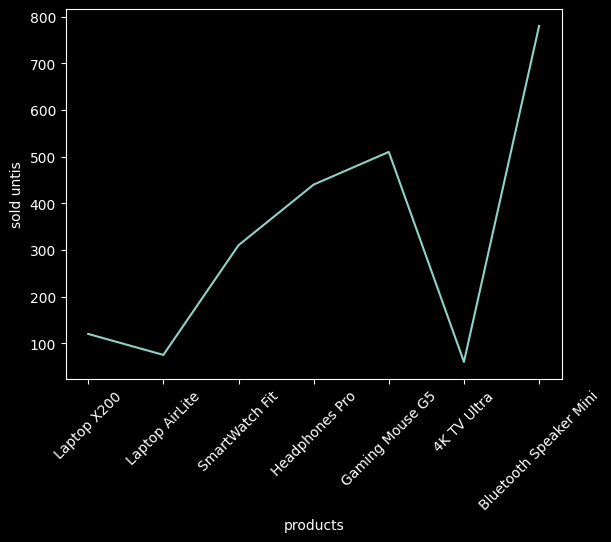

In [56]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

x = data_frame["product"].tolist()
y = data_frame["units_sold"].tolist()

plt.plot(x, y)
plt.xlabel("products")
plt.xticks(rotation=45)
plt.ylabel("sold untis")
plt.show()


## 5. Pandas – práca so stĺpcami

1. Vytvorte nový stĺpec `revenue`, ktorý bude predstavovať:

$$
revenue = price \times units\_sold
$$

2. Zistite:
- celkový obrat firmy  
- produkt s najväčším obratom  

3. Zoradte produkty podľa:
- ceny (vzostupne)  
- obratu (zostupne)

---

In [50]:
data_frame["revenue"] = data_frame["price"] * data_frame["units_sold"]
best_revenue_product = data_frame.loc[data_frame["revenue"].idxmax()]
sorted_by_price = data_frame.sort_values(by="price")
sorted_by_revenue = data_frame.sort_values(by="revenue", ascending=False)

print(data_frame[["product", "revenue"]], "\n")
print(best_revenue_product["product"], "\n")
print(sorted_by_price[["product", "price"]], "\n")
print(sorted_by_revenue[["product", "revenue"]])

                  product  revenue
0             Laptop X200   107880
1          Laptop AirLite    82425
2          SmartWatch Fit    61690
3          Headphones Pro    65560
4         Gaming Mouse G5    30090
5             4K TV Ultra    77940
6  Bluetooth Speaker Mini    30420 

Laptop X200 

                  product  price
6  Bluetooth Speaker Mini     39
4         Gaming Mouse G5     59
3          Headphones Pro    149
2          SmartWatch Fit    199
0             Laptop X200    899
1          Laptop AirLite   1099
5             4K TV Ultra   1299 

                  product  revenue
0             Laptop X200   107880
1          Laptop AirLite    82425
5             4K TV Ultra    77940
3          Headphones Pro    65560
2          SmartWatch Fit    61690
6  Bluetooth Speaker Mini    30420
4         Gaming Mouse G5    30090


## 6. Pandas – GroupBy a agregácia

1. Zoskupte produkty podľa stĺpca `category`.

2. Pre každú kategóriu vypočítajte:
- priemernú cenu  
- celkový počet predaných kusov  
- priemerný rating  

3. Výsledok uložte do nového DataFrame.

---

In [51]:
new_data_frame = (
    data_frame
    .groupby("category")
    .agg(
        avg_price=("price", "mean"),
        total_sold_units=("units_sold", "sum"),
        avg_rating=("rating", "mean")
    )
)

print(new_data_frame)

             avg_price  total_sold_units  avg_rating
category                                            
Accessories       59.0               510        4.10
Audio             94.0              1220        4.25
Electronics     1099.0               255        4.70
Wearables        199.0               310        4.20


## 7. Pandas – filtrovanie a podmienky

1. Nájdite produkty, ktoré:
- stoja viac ako **200 €** a zároveň majú rating vyšší ako **4.5**  
- majú počet predaných kusov vyšší ako je priemer  

2. Spočítajte, koľko takýchto produktov existuje.

---

In [52]:
conditioned_products_1 = data_frame[(data_frame["price"] > 200) & (data_frame["rating"] > 4.5)]
conditioned_products_count_1 = conditioned_products_1.shape[0]

conditioned_products_2 = data_frame[data_frame["units_sold"] > data_frame["units_sold"].mean()]
conditioned_products_count_2 = conditioned_products_2.shape[0]

print(conditioned_products_count_1)
print(conditioned_products_count_2)

3
3


## 8. NumPy – rozšírená štatistika

Použite knižnicu **NumPy** na stĺpec `price`.

1. Vypočítajte:
- smerodajnú odchýlku  
- minimálnu a maximálnu cenu  
- percentily (**25 %**, **50 %**, **75 %**)

2. Zistite, ktoré produkty majú cenu:
- nad priemerom  
- pod mediánom  

---

In [53]:
import numpy as np

prices = data_frame["price"].to_numpy()

std_prices = np.std(prices).round(2)

max_price = np.max(prices)
min_price = np.min(prices)

p25_price = np.percentile(prices, 25)
p50_price = np.percentile(prices, 50)
p75_price = np.percentile(prices, 75)

mean_price = np.mean(prices)
median_price = np.median(prices)

above_mean = data_frame[data_frame["price"] > mean_price]["product"]
below_median = data_frame[data_frame["price"] < median_price]["product"]

print(f"Standard deviation is {std_prices}\n"
      f"Max price is {max_price}\n"
      f"Min price is {min_price}\n"
      f"25th percentile is {p25_price}\n"
      f"50th percentile is {p50_price}\n"
      f"75th percentile is {p75_price}\n")

print(f"Products with price above mean are:")
for product in above_mean:
      print(f"{product}")

print()
print(f"Products with price below median are:")
for product in below_median:
      print(f"{product}")


Standard deviation is 502.67
Max price is 1299
Min price is 39
25th percentile is 104.0
50th percentile is 199.0
75th percentile is 999.0

Products with price above mean are:
Laptop X200
Laptop AirLite
4K TV Ultra

Products with price below median are:
Headphones Pro
Gaming Mouse G5
Bluetooth Speaker Mini


## 9. Matplotlib – rozšírené grafy

Vykreslite:

- stĺpcový graf obratu produktov  
- koláčový graf podielu predaja jednotlivých kategórií  

---

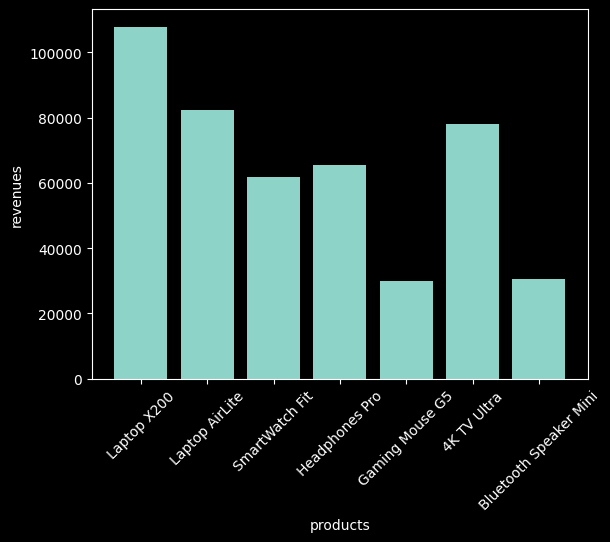

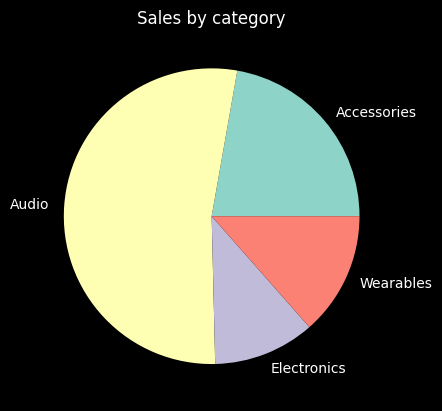

In [57]:
x_plot = data_frame["product"]
y_plot = data_frame["revenue"]

plt.bar(x_plot, y_plot)
plt.xticks(rotation=45)
plt.xlabel("products")
plt.ylabel("revenues")
plt.show()

values = data_frame.groupby("category")["units_sold"].sum()
labels = values.index

plt.pie(values, labels=labels)
plt.title("Sales by category")
plt.show()

## 10. BONUS – Tkinter

Vytvorte jednoduchú aplikáciu v **Tkinter**, ktorá:

- zobrazí tabuľku produktov  
- umožní vybrať kategóriu z `OptionMenu`  
- zobrazí:
  - priemernú cenu  
  - celkový obrat vybranej kategórie  

In [58]:
import tkinter as tk
from tkinter import ttk

def on_press():
    category = dropdown_menu.get()
    products = data_frame[data_frame["category"] == category]["product"].tolist()

    for widget in right_frame.winfo_children():
        widget.destroy()

    for p in products:
        label = tk.Label(right_frame, text=p, font=font, bg=bg, fg=fg)
        label.pack(side="top", fill="both", expand=True, padx=padx, pady=pady)

    for widget in left_2_frame.winfo_children():
        widget.destroy()

    avg_price = data_frame[data_frame["category"] == category]["price"].mean()
    total_revenue = data_frame[data_frame["category"] == category]["revenue"].sum()

    label = tk.Label(left_2_frame, text=f"Average price: {avg_price}", font=font, bg=bg, fg=fg)
    label.pack(side="top", fill="both", expand=True, padx=padx, pady=pady)

    label = tk.Label(left_2_frame, text=f"Total revenue: {total_revenue}", font=font, bg=bg, fg=fg)
    label.pack(side="top", fill="both", expand=True, padx=padx, pady=pady)

    return


categories = data_frame["category"].unique().tolist()

bg = "#1E1E1E"
fg = "white"

font= ("Arial", 25)
padx = 10
pady = 10

root = tk.Tk()

left_frame = tk.Frame(root, bg=bg)
right_frame = tk.Frame(root, bg=bg)

left_1_frame = tk.Frame(left_frame, bg=bg)
left_2_frame = tk.Frame(left_frame, bg=bg)

left_frame.pack(side="left")
right_frame.pack(side="left", fill="both")

left_1_frame.pack(side="top")
left_2_frame.pack(side="top")

dropdown_menu = ttk.Combobox(left_1_frame, values=categories, font=font)
dropdown_menu.pack(side="top", fill="both", expand=True, padx=padx, pady=pady)

button = tk.Button(left_1_frame, text="Submit", command=on_press, font=font, bg=bg, fg=fg)
button.pack(side="top", fill="both", expand=True, padx=padx, pady=pady)

root.mainloop()
